In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
filepath = "data/tanzania_water_training.csv"
details_df = pd.read_csv(filepath)
details_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
details_df.shape

(59400, 40)

In [12]:
details_df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [9]:
conditions_df = pd.read_csv("data/training_set_labels.csv")
conditions_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [13]:
conditions_df.shape

(59400, 2)

In [14]:
all_df = details_df.merge(conditions_df[["id", "status_group"]], on="id")
all_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [15]:
all_df.shape

(59400, 41)

In [16]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [17]:
all_df.isna().sum().sort_values(ascending=False)

scheme_name              28810
scheme_management         3878
installer                 3655
funder                    3637
public_meeting            3334
permit                    3056
subvillage                 371
wpt_name                     2
water_quality                0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
quantity                     0
quality_group                0
extraction_type              0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
extraction_type_group        0
id                           0
construction_year            0
amount_tsh                   0
recorded_by                  0
population                   0
ward                         0
lga                          0
district_code                0
region_c

In [45]:
missing_data = all_df.isnull().sum()
missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)
missing_df = pd.DataFrame({'missing number' :missing_data})
missing_df['missing percent'] = (missing_df['missing number'] / len(all_df)) * 100


Text(0.5, 1.0, 'Graph of missing records in the dataset')

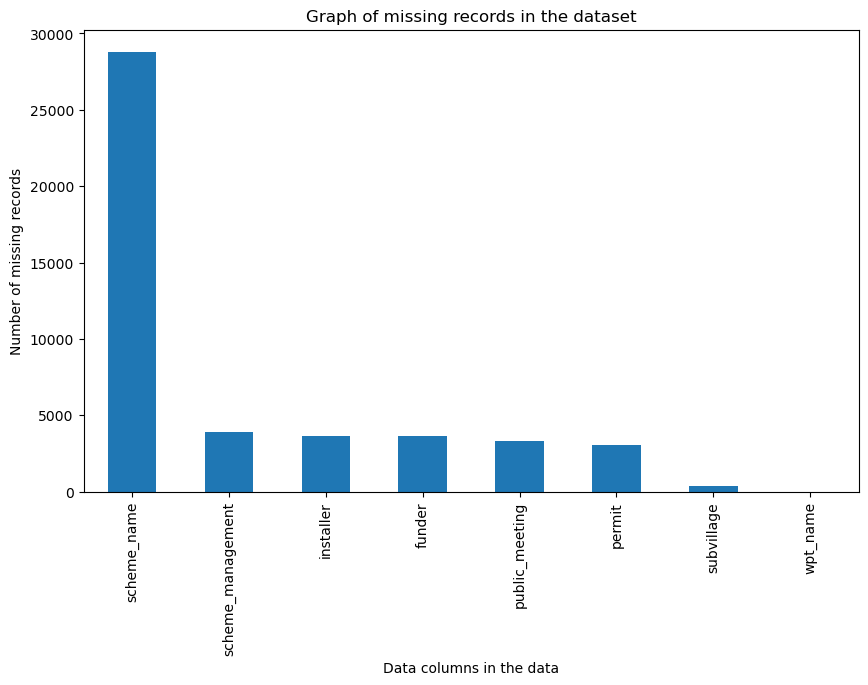

In [50]:
missing_data.plot(kind='bar', figsize=(10,6))
plt.ylabel("Number of missing records")
plt.xlabel("Data columns in the data")
plt.title("Graph of missing records in the dataset")

In [51]:
all_df.drop(['scheme_name'], axis=1, inplace=True)
all_df.shape

(59400, 40)

In [53]:
missing_list = all_df.isnull().sum().sort_values(ascending=False).to_list
missing_list

<bound method IndexOpsMixin.tolist of scheme_management        3878
installer                3655
funder                   3637
public_meeting           3334
permit                   3056
subvillage                371
wpt_name                    2
source_class                0
payment_type                0
waterpoint_type_group       0
extraction_type_class       0
management                  0
waterpoint_type             0
management_group            0
payment                     0
water_quality               0
source_type                 0
quality_group               0
quantity                    0
extraction_type             0
quantity_group              0
source                      0
extraction_type_group       0
id                          0
construction_year           0
amount_tsh                  0
recorded_by                 0
population                  0
ward                        0
lga                         0
district_code               0
region_code                 0
re